In [74]:
import pandas as pd
import json 
from sentence_transformers import SentenceTransformer
import glob
import faiss
from fuzzywuzzy import fuzz
from llmsherpa.readers import LayoutPDFReader
import matplotlib.pyplot as plt
import numpy as np
import os

In [75]:
# !pip install pandas
# !pip install sentence-transformers
# !pip install openpyxl
# !pip install fuzzywuzzy
# !pip install llmsherpa
# !pip install 

## Load model

In [3]:
model = SentenceTransformer('bert-base-nli-mean-tokens')

In [37]:
def split_data(data):
    return data["raw_text"].split("\n")

In [40]:
def read_json_from_folders(directory_path):
    """
    Reads all JSON files from each folder in the specified directory.

    :param directory_path: Path to the directory containing folders of JSON files.
    :return: A list of dictionaries where each dictionary contains data from a single JSON file.
    """
    all_data = []
    filenames = []
    search_pattern = f"{directory_path}/*/*.json"
    for file_path in glob.glob(search_pattern):
        with open(file_path, 'r') as file:
            data = json.load(file)
            data = split_data(data)
            filenames.extend([file_path]*len(data))
            all_data.extend(data)
    return all_data, filenames

In [41]:
directory_path = r'C:\Users\J C SINGLA\Downloads\External - take_home_challenge_(withJSONs)\take_home_challenge_(withJSONs)\raw_text'
all_data, filenames = read_json_from_folders(directory_path)

In [265]:
doc_name = "DR--110685614"
subset_str = "C:\\Users\\J C SINGLA\\Downloads\\External - take_home_challenge_(withJSONs)\\take_home_challenge_(withJSONs)\\raw_text\\" +doc_name+"\\raw_text.json"

In [458]:
sentence_embeddings = model.encode(all_data_sherpa)

In [459]:
sentence_embeddings.shape

(488, 768)

DRAGON+

In [1]:
import torch
from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained('facebook/dragon-plus-query-encoder')
query_encoder = AutoModel.from_pretrained('facebook/dragon-plus-query-encoder')
context_encoder = AutoModel.from_pretrained('facebook/dragon-plus-context-encoder')

# We use msmarco query and passages as an example
query =  "Where was Marie Curie born?"
contexts = [
    "Maria Sklodowska, later known as Marie Curie, was born on November 7, 1867.",
    "Born in Paris on 15 May 1859, Pierre Curie was the son of Eugène Curie, a doctor of French Catholic origin from Alsace."
]
# Apply tokenizer
query_input = tokenizer(query, return_tensors='pt')
ctx_input = tokenizer(contexts, padding=True, truncation=True, return_tensors='pt')
# Compute embeddings: take the last-layer hidden state of the [CLS] token
query_emb = query_encoder(**query_input).last_hidden_state[:, 0, :]
ctx_emb = context_encoder(**ctx_input).last_hidden_state[:, 0, :]
# Compute similarity scores using dot product
score1 = query_emb @ ctx_emb[0]  # 396.5625
score2 = query_emb @ ctx_emb[1]  # 393.8340


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

C:\Users\J C SINGLA\miniconda3\Lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\J C SINGLA\.cache\huggingface\hub\models--facebook--dragon-plus-query-encoder. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

C:\Users\J C SINGLA\miniconda3\Lib\site-packages\huggingface_hub\file_download.py:148: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\J C SINGLA\.cache\huggingface\hub\models--facebook--dragon-plus-context-encoder. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [3]:
score2

tensor([393.8340], grad_fn=<MvBackward0>)

In [ ]:
ctx_emb = context_encoder(**ctx_input).last_hidden_state[:, 0, :]

# Index Flat2

In [460]:
d = sentence_embeddings.shape[1]
index = faiss.IndexFlatL2(d)
index.add(sentence_embeddings)
index.is_trained

True

In [461]:
# # COSINE INDEX
# index = faiss.IndexFlatL2(d)
# sentence_embeddings = sentence_embeddings / np.linalg.norm(sentence_embeddings, axis=1, keepdims=True)
# index.add(sentence_embeddings)
# index.ntotal

# Ground Truth

In [462]:
ground_truth_path = r"C:\Users\J C SINGLA\Downloads\External - take_home_challenge_(withJSONs)\take_home_challenge_(withJSONs)\document_questions.xlsx"

In [463]:
ground_truth = pd.read_excel(ground_truth_path)

In [464]:
# ground_truth

In [465]:
ground_truth_text = ground_truth[ground_truth["complexity"]=="text"].copy()

In [466]:
# ground_truth_text

# Inference

In [467]:
def test_case():
    query = ["What legislative suggestions pertaining to workplace sexual harassment does the firm provide in its submission?", 
                  "What legislative suggestions pertaining to workplace sexual harassment does the firm provide in its submission?"]
    return faiss_inference(query)[0] == faiss_inference(query)[1]

In [468]:
def faiss_inference(idx, data, query, k=4):
    if isinstance(query, list):
        xq = model.encode(query)
        D, I = idx.search(xq, k)
        retrieved_items = [[data[i] for i in sublist] for sublist in I]
        assert test_case()
    else:
        xq = model.encode([query])
        D, I = idx.search(xq, k)
        retrieved_items = [data[i] for i in list(I[0])]
    return retrieved_items    

In [469]:
test_data = list(ground_truth_text["relevant questions"])
test_labels = list(ground_truth_text["answer"])

In [470]:
ret_context = []
for i in range(len(test_data)):
    ret_context.append(faiss_inference(index, all_data_sherpa, test_data[i]))

# Testing 

In [499]:
def recall_k(test_labels, ret_context, k=len(ret_context[0])):
    ctr = 0
    correct, incorrect = [], []
    for i in range(len(ret_context)):
        done = False
        if isinstance(test_labels[i], float):
            # handle case for when answer is not present in the pdf
            continue
        for j in range(min(k,len(ret_context))):
            if fuzz.partial_ratio(test_labels[i], ret_context[i][j])>=90 and len(ret_context[i][j])>=len(test_labels[i])*0.95:
                # print ("test_labels:", test_labels[i], "\n", "ret_context:", ret_context[i][j])
                ctr += 1
                done = True
                break
                
        if done == False:
            incorrect.append({test_labels[i]:ret_context[i]})

        else:
            correct.append({test_labels[i]:ret_context[i]})

    return ctr/len(ret_context), incorrect, correct

In [500]:
# all_data_sherpa

In [501]:
recall, incorrect, correct = recall_k(test_labels, ret_context)

In [502]:
recall

0.42857142857142855

In [503]:
incorrect[0].keys()

dict_keys(['This year the Oregon Section retained the domain name, www.oregonite.org . The website remained very dynamic and was modified significantly to reflect the changing needs of the Section. The web page includes information about meetings, activities, officer contact information, upcoming conferences, available jobs, and section news. The site always has the current and upcoming meeting information posted, and on-line registration for Section meetings continued to be both popular and successful. In addition, electronic download of the registration information were used to produce the registration list, name badges and written receipts for any specific event. This form of registration has proven to be very effective and user friendly for members.'])

In [507]:
list(incorrect[0].values())[0][3]

'12This one feature has generated an extensive literature which is surveyed in Kocherlakota (1996) and more recently in Mehra (January/February 2003).'

In [494]:
len("This year we had 52 students from six universities attending the event. Participating schools were: \nPortland State University \nUniversity of Idaho \nUniversity of Portland \nOregon State University \nUniversity of Washington \nOregon Institute of Technology ")

255

In [406]:
# string_A = "This year we had 52 students from six universities attending the event. Participating schools were: \nPortland State University \nUniversity of Idaho \nUniversity of Portland \nOregon State University \nUniversity of Washington \nOregon Institute of Technology"

# string_B = "This year we had 52 students from six universities attending the event. Participating schools were: \nUniversity of Idaho \nUniversity of Portland \nOregon State University \nUniversity of Washington \nOregon Institute of Technology."
string_A = list(incorrect[0].values())[0][0]
string_B = list(incorrect[0].keys())[0]
similarity_score = fuzz.partial_ratio(string_A, string_B)
similarity_score

94

In [ ]:
# sherpa data
# missing chunking - 3
# not using tokens for search - 2
# too many references to fetch - 1

In [ ]:
# original data
# missing chunking - 3
# not using tokens for search - 2
# too many references to fetch - 1

In [196]:
top10 = faiss_inference("In what cases should online sexual harassment be criminalized according to the submission?", 10)

In [206]:
top10[9]

'Seek injunctive relief and damages from the perpetrators of on-line sexual harassment, and '

# Better chunking

In [31]:
# tables = []
# for table in doc.tables():
#     tables.append(table.to_text())

In [76]:
def flatten_list(nested_list):
    flattened = []
    for item in nested_list:
        if isinstance(item, list):
            flattened.extend(flatten_list(item))
        else:
            flattened.append(item)
    return flattened

In [77]:
llmsherpa_api_url = "https://readers.llmsherpa.com/api/document/developer/parseDocument?renderFormat=all"
def read_pdf(pdf_url):
    pdf_reader = LayoutPDFReader(llmsherpa_api_url)
    doc = pdf_reader.read_pdf(pdf_url)
    return doc

In [78]:
def get_section_text(doc, section_title):
    """
    Extracts the text from a specific section in a parsed PDF document.

    Parameters:
    - doc (Document): A Document object from the llmsherpa.readers.layout_reader library.
    - section_title (str): The title of the section to extract.

    Returns:
    - str: The HTML representation of the section's content, or a message if the section is not found.
    """
    selected_section = None
    for section in doc.sections():
        if section.title == section_title:
            selected_section = section
            break

    if not selected_section:
        return f"No section titled '{section_title}' found."
    return selected_section.to_html(include_children=True, recurse=True)

In [79]:
def rechunker(directory_path):
    all_data = []
    filenames = []
    search_pattern = f"{directory_path}/*.pdf"
    print ()
    for i in glob.glob(search_pattern):
        print (i)
        doc = read_pdf(i)
        sections = []
        # get all the sections in that doc
        for section in doc.sections():
            sections.append(section.title)
            text = get_section_text(doc, section.title)
            all_data.append(text)
            filenames.append(i)
    return all_data, filenames

In [80]:
def aggregate_string_lengths(lst1,lst2):
    return sum(len(item) for item in lst1 if isinstance(item, str)) + sum(len(item) for item in lst2 if isinstance(item, str))

In [81]:
def check_criteria(lst):
    if lst[-1] == ":" or "below" in "\n".join(lst):
        return True
    else:
        return False

In [82]:
def process_doc(doc):
    prev_tag = ""
    doc_sentences = list(doc["sentences"])
    doc_tags = list(doc["tag"])
    merge_list, j = [], -1
    
    for i in range(len(doc)):
        # print (i, prev_tag, doc_tags[i])
        if doc_tags[i] == "para" and prev_tag == "para" and check_criteria(merge_list[j]):
            merge_list[j].extend(doc_sentences[i])
            prev_tag = "para"
            
        elif doc_tags[i] == "list_item" and prev_tag == "para":
            merge_list[j].extend(doc_sentences[i])
            prev_tag = "list_item"
            
        elif doc_tags[i] == "list_item" and prev_tag == "list_item":
            merge_list[j].extend(doc_sentences[i])
            prev_tag = "list_item"
            
        elif doc_tags[i]=="para":
            merge_list.append(doc_sentences[i])
            prev_tag = "para"
            j = j + 1
        else:
            prev_tag = doc_tags[i]
    return merge_list

In [83]:
def clean_doc(doc):
    doc = [x.encode('ascii', 'ignore').decode('ascii') for x in doc if len(x)>100]
    return doc

In [84]:
# TAKE: llmsherpa messing up headers but paras are good
# still some paras might be messed up e.g. very small paras that are actually numbers
def get_paras(directory_path):
    all_data = []
    filenames = []
    search_pattern = f"{directory_path}/*.pdf"
    for i in glob.glob(search_pattern):
        print (i)
        doc = read_pdf(i)
        doc = pd.DataFrame(doc.json)
        doc = process_doc(doc)
        doc = ["\n".join(x) for x in doc]
        doc = clean_doc(doc)
        filenames.extend([i]*len(doc))
        all_data.append(doc)
        print (len(all_data), len(filenames))
    return all_data, filenames

In [85]:
def dedup_list_pairs(list1, list2):
    unique_list1 = set()
    unique_list2 = []
    for i, item in enumerate(list1):
        if item not in unique_list1:
            unique_list1.add(item)
            unique_list2.append(list2[i])
    return list(unique_list1), unique_list2

In [86]:
all_data_sherpa, filenames_sherpa = get_paras("/Users")

/Users\DR--185549702_INTRO.pdf
1 297


In [87]:
all_data_sherpa = flatten_list(all_data_sherpa)

In [88]:
print (len(all_data_sherpa), len(filenames_sherpa))

297 297


In [111]:
all_data_sherpa[63]

'Given this setup, all agents care about in terms of money holdings are the relative returns of the two currencies.\nIn an equilibrium where both currencies are held, these returns must be equal.'

In [21]:
save_path = r"C:\Users\J C SINGLA\Downloads\External - take_home_challenge_(withJSONs)\take_home_challenge_(withJSONs)\data"

In [27]:
def write_list_to_file(directory, filename, lst):
    if not os.path.exists(directory):
        os.makedirs(directory)
    file_path = os.path.join(directory, filename)
    with open(file_path, 'w') as file:
        json.dump(lst, file)

In [30]:
def read_list_from_file(directory, filename):
    file_path = os.path.join(directory, filename)
    if os.path.exists(file_path):
        with open(file_path, 'r') as file:
            return json.load(file)
    else:
        return None  # or an empty list, depending on your needs

In [31]:
all_data_sherpa = read_list_from_file(save_path, "sherpa_paras")

In [33]:
filenames_sherpa = read_list_from_file(save_path, "sherpa_paras_filenames")

In [34]:
len(filenames_sherpa)

488

In [29]:
write_list_to_file(save_path, "sherpa_paras_filenames", filenames_sherpa)

# Create an index on completed chunks to map to incomplete chunks

In [326]:
all_data_sherpa

['Transition Task: Prepared for the Project, Teaching to Fish (Build Tasks) Integrating OALCF Task Development within Ontarios Literacy Programs (2014)',
 'Complete an agenda for a training schedule and traveling times.',
 'A: Find and Use Information B: Communicate Ideas and Information C: Understand and Use Numbers D: Use Digital Technology Task Group(s): A1: Read continuous text A2: Interpret documents B3: Complete and create documents C2: Manage time\nA2.2: Interpret simple documents to locate and connect information B3.2a: Use layout to determine where to make entries in simple documents B3.2b: Create simple documents to sort, display and organize information\nC2.1: Measure time and make simple calculations\nC4.1: Make simple comparisons and calculations D.2: Perform well-defined, multi-step digital tasks',
 'Performance Descriptors: see chart on last page\n Computer with a word processing program or spreadsheet program',
 'You have decided that returning to school is the best opt

In [293]:
sentence_embeddings1 = model.encode(all_data_sherpa)

In [294]:
d = sentence_embeddings.shape[1]
index1 = faiss.IndexFlatL2(d)
index1.add(sentence_embeddings)
index.is_trained

True

In [296]:
len(ret_context)

14

In [308]:
rechunk_ret_context = []
for i in range(len(ret_context)):
    temp = []
    for j in range(len(ret_context[i])):
        temp.extend(faiss_inference(index1, all_data, ret_context[i][j], 1))
    rechunk_ret_context.append(temp)

In [325]:
rechunk_ret_context[1][2]

'This year we had 52 students from six universities attending the event. Participating schools were: '

In [324]:
ret_context[1][2]

'This year we had 52 students from six universities attending the event. Participating schools were: '

In [405]:
all_data = all_data + all_data_sherpa
filenames = filenames + filenames_sherpa

In [407]:
# TODO: we need better cleaning on this
all_data_, filenames_ = dedup_list_pairs(all_data, filenames)

In [447]:
all_data[164]

'12 Submission of the Human Rights and Equal Opportunity Commission to the Senate Legal and Constitutional Affairs Committee, Inquiry Into The Effectiveness Of The Sex Discrimination Act 1984 (Cth) In Eliminating Discrimination And Promoting Gender Equality, 2008, pg145. '

In [ ]:
# TAKEAWAY: some of these are headers and we want to remove them
# Assumption: The distribution of lengths will be bimodal -> True/bimodal with peak at 25 characters -> let's start removing with 50 characters

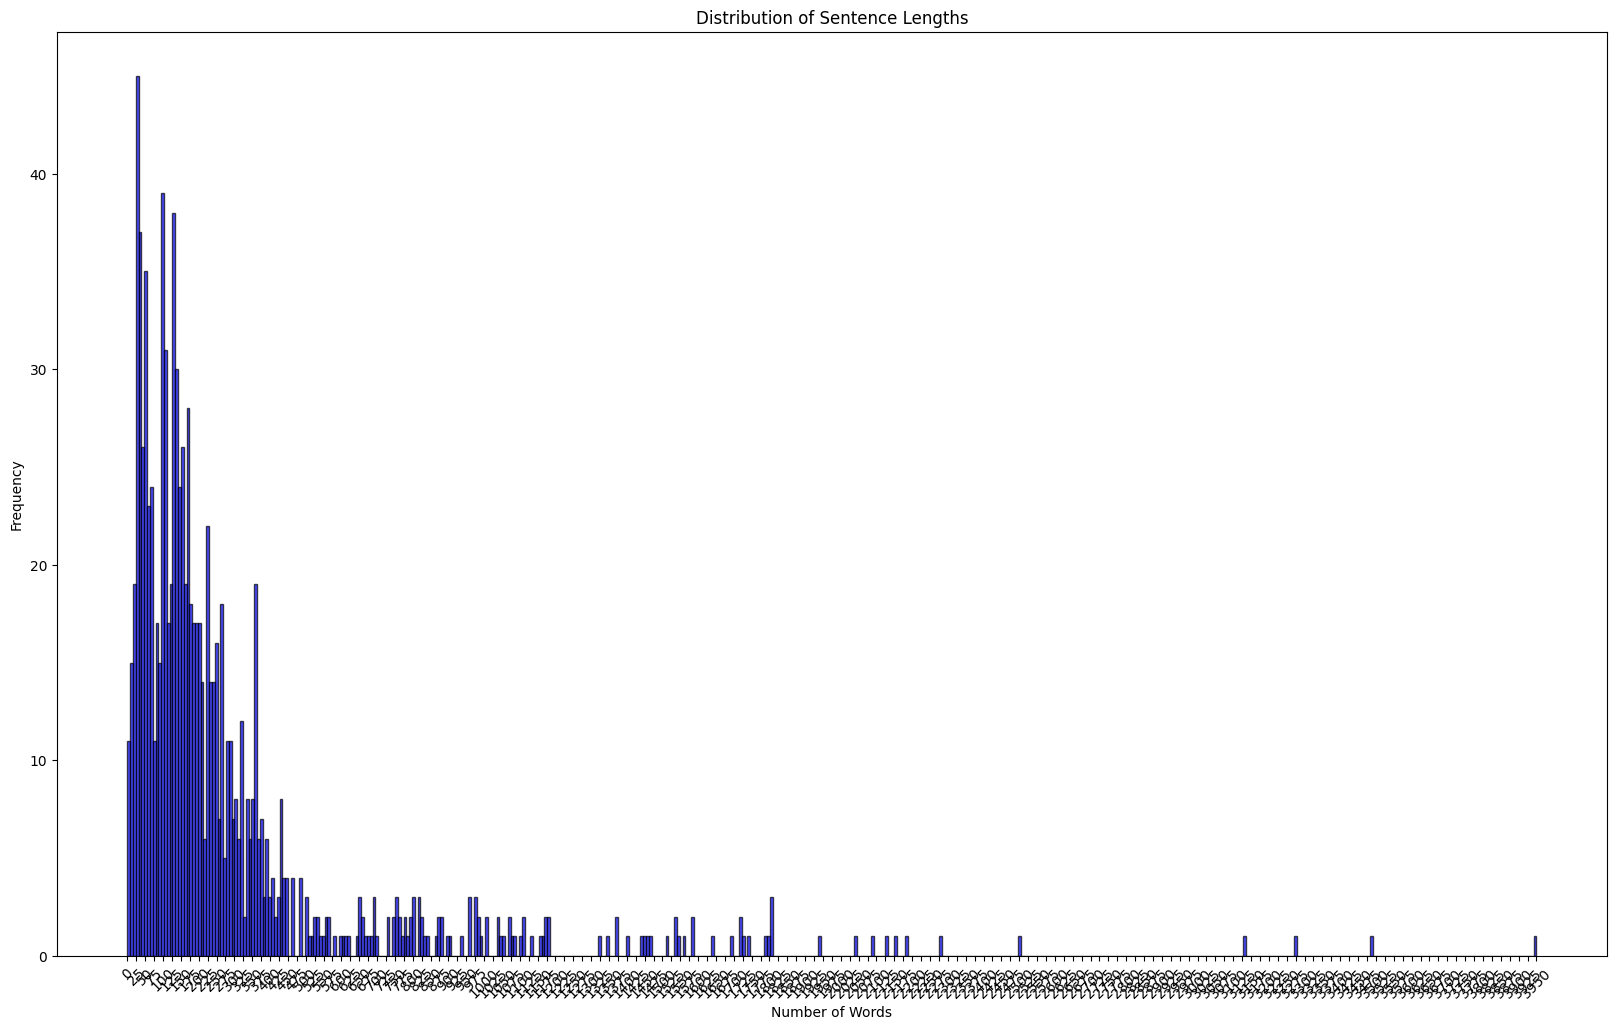

In [474]:
word_counts = [len(sentence) for sentence in all_data]

# Plotting the histogram
plt.figure(figsize=(20, 12))
plt.hist(word_counts, bins=500, alpha=0.7, color='blue', edgecolor='black')
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.xticks(range(min(word_counts), max(word_counts) + 1, 25))
plt.xticks(rotation=45)
plt.show()

In [494]:
# Takeaway: manually inspected the values less than length 100
all_data = [(k,v) for (k, v) in zip(all_data_, filenames_) if len(k)>100]

In [496]:
filenames = [i[1] for i in all_data]
all_data = [i[0] for i in all_data]

In [499]:
sentence_embeddings = model.encode(all_data)

In [205]:
words = """
The Student Liaison Committee had another successful year in attracting schools from the Pacific 
Northwest to compete in the Oregon Section's annual Traffic Bowl Competition. The Traffic Bowl is 
a Jeopardy-based trivia contest where students must answer questions on a variety of traffic and 
transportation trivia. This year the competition was held on November 15, 2007 at McMenamin's 
Edgefield just east of Portland, Oregon.  
This year we had 52 students from six universities attending the event. Participating schools were: 
Portland State University 
University of Idaho 
University of Portland 
Oregon State University 
University of Washington 
Oregon Institute of Technology 
"""

In [209]:
len(words)

690